In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [3]:
dataset = pd.read_csv('countries_with_top_sellers_fashion_c2c.csv')
dataset

,country,sellers,topsellers,topsellerratio,femalesellersratio,topfemalesellersratio,femalesellers,malesellers,topfemalesellers,topmalesellers,...,topmeanproductssold,topmeanproductslisted,meanproductssold,meanproductslisted,meanofflinedays,topmeanofflinedays,meanfollowers,meanfollowing,topmeanfollowers,topmeanfollowing
0,Taiwan,1,1,100.0,100.0,100.0,1,0,1,0,...,57.000000,56.000000,57.000000,56.000000,11.0,11.0,83.0,8.0,83.0,8.0
1,Slovaquie,2,1,50.0,0.0,0.0,0,2,0,1,...,27.000000,14.000000,14.000000,7.000000,17.0,15.0,10.5,8.5,15.0,8.0
2,Lettonie,4,2,50.0,100.0,100.0,4,0,2,0,...,40.500000,18.000000,20.750000,9.000000,120.3,11.5,21.0,52.3,38.0,98.5
3,Bulgarie,9,4,44.4,66.7,100.0,6,3,4,0,...,36.250000,17.250000,18.888889,9.111111,98.3,19.0,28.6,31.6,46.3,19.0
4,Chypre,4,1,25.0,100.0,100.0,4,0,1,0,...,41.000000,66.000000,14.000000,20.250000,17.3,11.0,21.3,10.3,39.0,17.0
5,Monaco,5,1,20.0,100.0,100.0,5,0,1,0,...,170.000000,19.000000,38.000000,5.200000,51.6,12.0,39.6,8.0,167.0,8.0
6,Roumanie,13,2,15.4,76.9,50.0,10,3,1,1,...,24.500000,19.500000,5.230769,5.923077,121.6,11.0,10.9,11.5,30.0,32.0
7,Luxembourg,7,1,14.3,85.7,100.0,6,1,1,0,...,30.000000,0.000000,6.142857,1.142857,73.6,11.0,15.9,8.4,52.0,3.0
8,Espagne,119,13,10.9,81.5,76.9,97,22,10,3,...,46.692308,23.153846,8.319328,4.991597,202.4,30.5,16.1,14.6,53.2,14.5
9,Italie,347,35,10.1,71.5,65.7,248,99,23,12,...,39.685714,30.771429,8.126801,6.391931,141.8,26.5,16.1,54.6,63.4,429.3


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 19 non-null     object 
 1   sellers                 19 non-null     int64  
 2   topsellers              19 non-null     int64  
 3   topsellerratio          19 non-null     float64
 4   femalesellersratio      19 non-null     float64
 5   topfemalesellersratio   19 non-null     float64
 6   femalesellers           19 non-null     int64  
 7   malesellers             19 non-null     int64  
 8   topfemalesellers        19 non-null     int64  
 9   topmalesellers          19 non-null     int64  
 10  countrysoldratio        19 non-null     float64
 11  bestsoldratio           19 non-null     float64
 12  toptotalproductssold    19 non-null     int64  
 13  totalproductssold       19 non-null     int64  
 14  toptotalproductslisted  19 non-null     int6

In [5]:
X = dataset.iloc[:, [8,21]].values 
#choose any two that create the highest combination score

In [6]:
#Normalise your dataset with Standard Scaler

In [7]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X)
X_scaled

array([[-0.58621767, -0.62746932],
       [-0.72901428, -0.43073802],
       [-0.44342106, -0.60287791],
       [-0.15782783, -0.23400671],
       [-0.58621767, -0.62746932],
       [-0.58621767, -0.5782865 ],
       [-0.58621767, -0.62746932],
       [-0.58621767, -0.62746932],
       [ 0.69895183,  0.33159579],
       [ 2.55530778,  0.13486449],
       [-0.58621767, -0.62746932],
       [-0.58621767, -0.62746932],
       [-0.44342106, -0.54385852],
       [ 1.84132472,  0.42504316],
       [-0.58621767, -0.62746932],
       [-0.15782783,  2.73663601],
       [-0.01503122,  2.60876066],
       [-0.58621767, -0.08645823],
       [ 2.12691794,  0.63161103]])

C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


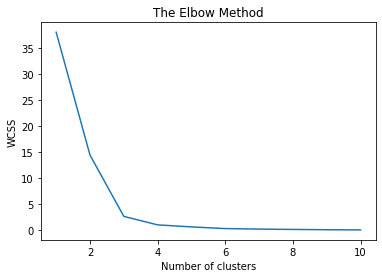

In [8]:
# Using the elbow method to calculate for the optimum cluster size K
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title("The Elbow Method")
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [9]:
# Using this cluster size K to cluster your dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_scaled)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 2, 0, 1])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


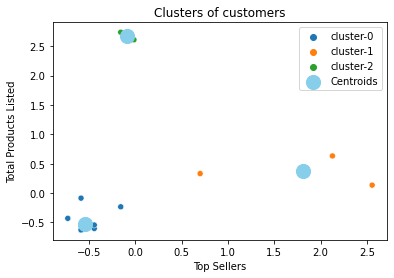

In [10]:
# Visualize your clustering results
sns.scatterplot(X_scaled[:,0], X_scaled[:, 1], hue = ["cluster-{}".format(x) for x in y_kmeans])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c ='skyblue', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Top Sellers')
plt.ylabel('Total Products Listed')
plt.legend()
plt.show()

In [11]:
#Evaluate your clustering results using the Silhouette Score
score = silhouette_score(X_scaled, kmeans.labels_, metric='euclidean')
print(score)                        

0.8299077466944745
